## Language Reality Check for 2017 with data from 2018


Our questions to answer are:
1. How big was the change in language use between 2017 and 2018 actually?
2. How big is the difference between what developers wanted to work with in 2018 and what they actually worked with?

Since we want to compare the data from 2018 with the data from 2017. We will first load the data from 2017 and process it like in the *language_popularity_2017* notebook.

In [23]:
from pathlib import Path

import pandas as pd


DATA_DIR = Path() / '..' / 'data'
FILE_NAME_2017 = 'survey_results_public_2017.csv'

df_2017 = pd.read_csv(str(DATA_DIR / FILE_NAME_2017))

In [50]:
df_q1 = df_2017[['Respondent', 'HaveWorkedLanguage']]
df_q1 = df_q1[df_q1['HaveWorkedLanguage'].notna()]

# Normalize the HaveWorkedLanguage column
df_q1 = df_q1.assign(HaveWorkedLanguage=df_q1['HaveWorkedLanguage'].str.split(';')).explode('HaveWorkedLanguage')
df_q1['HaveWorkedLanguage'] = df_q1['HaveWorkedLanguage'].apply(lambda x: str(x).strip())

counts_per_lang = df_q1['HaveWorkedLanguage'].value_counts()
percentage_per_lang = counts_per_lang / df_q1['Respondent'].nunique()
percentage_per_lang.head()

JavaScript    0.624573
SQL           0.512055
Java          0.396560
C#            0.340642
Python        0.319563
Name: HaveWorkedLanguage, dtype: float64

In [51]:
df_q2 = df_2017[['Respondent', 'WantWorkLanguage']]
df_q2 = df_q2[df_q2['WantWorkLanguage'].notna()]

# Normalize the HaveWorkedLanguage column
df_q2 = df_q2.assign(WantWorkLanguage=df_q2['WantWorkLanguage'].str.split(';')).explode('WantWorkLanguage')
df_q2['WantWorkLanguage'] = df_q2['WantWorkLanguage'].apply(lambda x: str(x).strip())

counts_want_per_lang = df_q2['WantWorkLanguage'].value_counts()
percentage_want_per_lang = counts_want_per_lang / df_q2['Respondent'].nunique()
percentage_want_per_lang.head()

JavaScript    0.483462
Python        0.372213
SQL           0.332149
C#            0.301649
Java          0.295757
Name: WantWorkLanguage, dtype: float64

### Question 1

The data processing for the 2018 data is almost the same. The *HaveWorkedLanguage* column was just renamed to *LanguageWorkedWith*

In [17]:
from pathlib import Path

import pandas as pd


DATA_DIR = Path() / '..' / 'data'
FILE_NAME_2018 = 'survey_results_public_2018.csv'

df_2018 = pd.read_csv(str(DATA_DIR / FILE_NAME_2018), dtype=object)

df_q1_18 = df_2018[['Respondent', 'LanguageWorkedWith']]
df_q1_18 = df_q1_18[df_q1_18['LanguageWorkedWith'].notna()]

# Normalize the HaveWorkedLanguage column
df_q1_18 = df_q1_18.assign(LanguageWorkedWith=df_q1_18['LanguageWorkedWith'].str.split(';')).explode('LanguageWorkedWith')
df_q1_18['LanguageWorkedWith'] = df_q1_18['LanguageWorkedWith'].apply(lambda x: str(x).strip())

counts_per_lang = df_q1_18['LanguageWorkedWith'].value_counts()
percentage_per_lang_18 = counts_per_lang / df_q1_18['Respondent'].nunique()
percentage_per_lang_18

JavaScript              0.698113
HTML                    0.684607
CSS                     0.650790
SQL                     0.570250
Java                    0.453456
Bash/Shell              0.397937
Python                  0.387558
C#                      0.344091
PHP                     0.307287
C++                     0.253683
C                       0.230321
TypeScript              0.173947
Ruby                    0.100991
Swift                   0.080553
Assembly                0.073531
Go                      0.070621
Objective-C             0.070340
VB.NET                  0.067072
R                       0.061442
Matlab                  0.058263
VBA                     0.048638
Kotlin                  0.044783
Scala                   0.043659
Groovy                  0.043059
Perl                    0.041872
Visual Basic 6          0.039408
Lua                     0.034889
CoffeeScript            0.033230
Delphi/Object Pascal    0.025851
Haskell                 0.025034
Rust      

Now we can compute the differences per language.

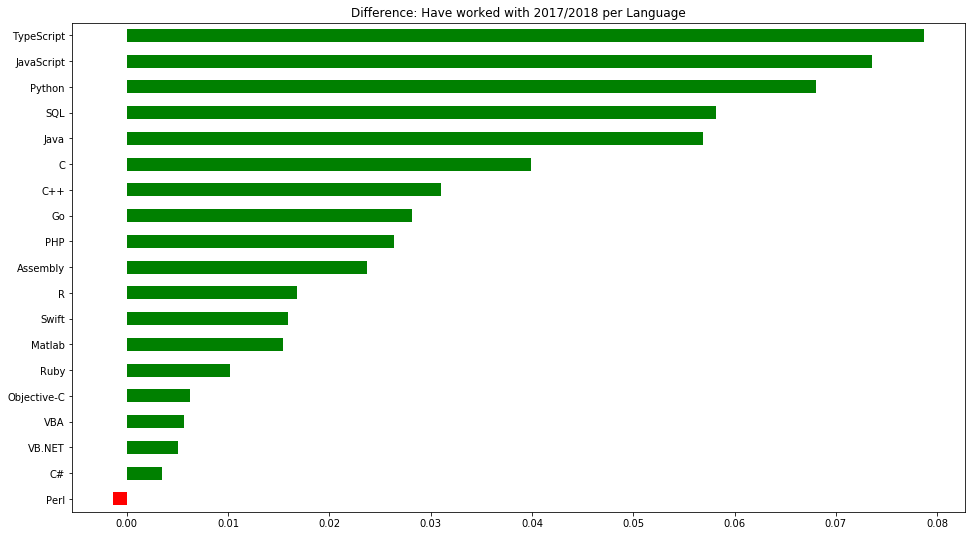

In [49]:
diff_17_18 = (percentage_per_lang_18 - percentage_per_lang[percentage_per_lang >= 0.04]).dropna().sort_values()
diff_17_18.plot.barh(
    x='Language',
    color =(diff_17_18 > 0).map({True: 'g',
                                 False: 'r'}),
    title='Difference: Have worked with 2017/2018 per Language',
    figsize=(16, 9))#.get_figure().savefig("diff_have_want.png", dpi=600)


Suprisingly we can see that almost all languages have grown in usage. A factor for that is probably that the respondents in 2018 were other (and more) persons than in 2017. Therefore, the overall average respondent's profile also changed.

### Question 2

To answer question 2 we compare the *WantWorkLanguage* data from 2017 with the *LanguageWorkedWith* from 2018.

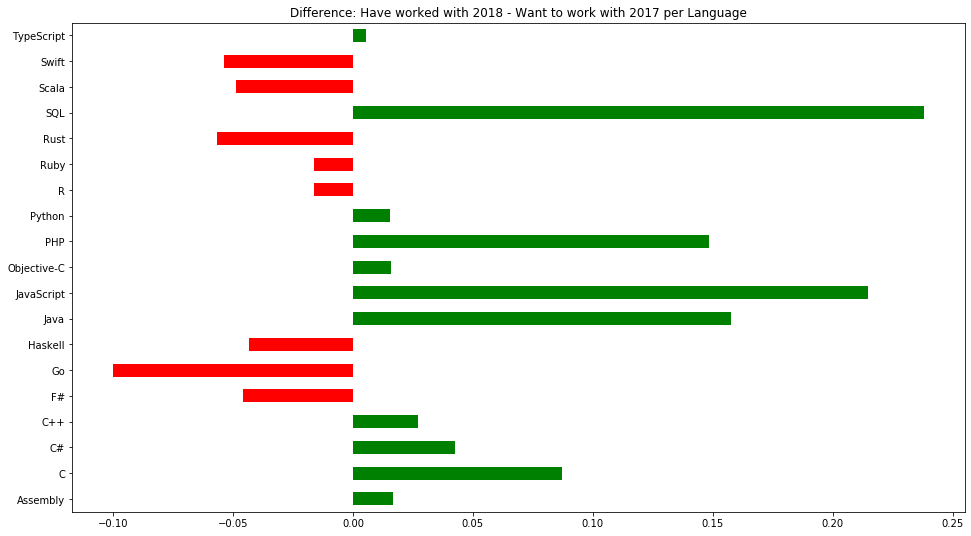

In [45]:
diff_17_want_18_have = (percentage_per_lang_18 - percentage_want_per_lang[percentage_want_per_lang >= 0.05]).dropna()
diff_17_want_18_have.plot.barh(
    x='Language',
    color =(diff_17_want_18_have > 0).map({True: 'g',
                                           False: 'r'}),
    title='Difference: Have worked with 2018 - Want to work with 2017 per Language',
    figsize=(16, 9)).get_figure().savefig("diff_want_17_have_18.png", dpi=600)
